<a href="https://colab.research.google.com/github/MadhuraTonpe165/Assignments/blob/main/Assignment_LogisticRegression_DryBeabDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = ""

# Load the latest version
path = kagglehub.dataset_download("nimapourmoradi/dry-bean-dataset-classification")
  #file_path
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
#)
print("Path to dataset files:", path)
#print("First 5 records:", df.head())

Path to dataset files: /kaggle/input/dry-bean-dataset-classification


In [ ]:
# /kaggle/input/dry-bean-dataset-classification/Dry_Bean_Dataset.csv

# insurance dataset
df = pd.read_csv("/kaggle/input/dry-bean-dataset-classification/Dry_Bean_Dataset.csv")

print("First 5 records:", df.head())

First 5 records:     Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.91335

In [ ]:
#Information About Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
# Finding the duplicate records
int(df.duplicated().sum())

68

In [ ]:
# Dropping the duplicate records
df.drop_duplicates(inplace= True)

In [ ]:
# Finding the duplicate records
int(df.duplicated().sum())

0

In [ ]:
'''
Conclusion ->
All the columns are in correct data types as expected
'''

'\nConclusion ->\nAll the columns are in correct data types as expected\n'

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13543.0,53048.460385,29392.438324,20420.000000,36282.500000,44580.000000,61382.000000,254616.000000
Perimeter,13543.0,854.993406,214.722684,524.736000,703.230000,793.896000,977.146500,1985.370000
MajorAxisLength,13543.0,319.895602,85.809260,183.601165,253.086806,296.404589,376.312489,738.860154
MinorAxisLength,13543.0,202.365321,45.051632,122.512653,175.886357,192.491117,217.245403,460.198497
AspectRation,13543.0,1.581075,0.245245,1.024868,1.430662,1.549860,1.703916,2.430306
Eccentricity,13543.0,0.750315,0.091858,0.218951,0.715144,0.763997,0.809671,0.911423
ConvexArea,13543.0,53767.986709,29844.248525,20684.000000,36673.000000,45122.000000,62360.000000,263261.000000
EquivDiameter,13543.0,253.034094,59.307709,161.243764,214.933277,238.245711,279.560351,569.374358
Extent,13543.0,0.749829,0.048939,0.555315,0.718735,0.759903,0.786849,0.866195
Solidity,13543.0,0.987152,0.004650,0.919246,0.985678,0.988288,0.990019,0.994677


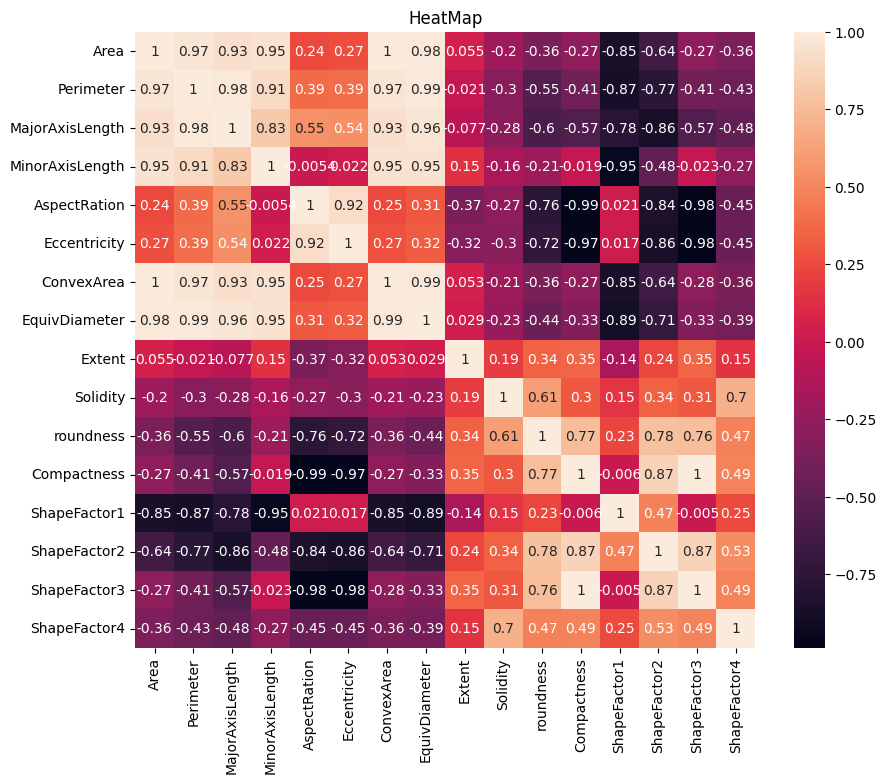

In [ ]:
# Heatmap ->

plt.figure(figsize = (10,8))
sns.heatmap(df.corr(numeric_only= True), annot = True)
plt.title('HeatMap')
plt.show()

In [ ]:
df["Class"].value_counts()

,count
Class,
DERMASON,3546
SIRA,2636
SEKER,2027
HOROZ,1860
CALI,1630
BARBUNYA,1322
BOMBAY,522


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding
df['Class_encoded'] = le.fit_transform(df['Class'])

print(df)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.54981

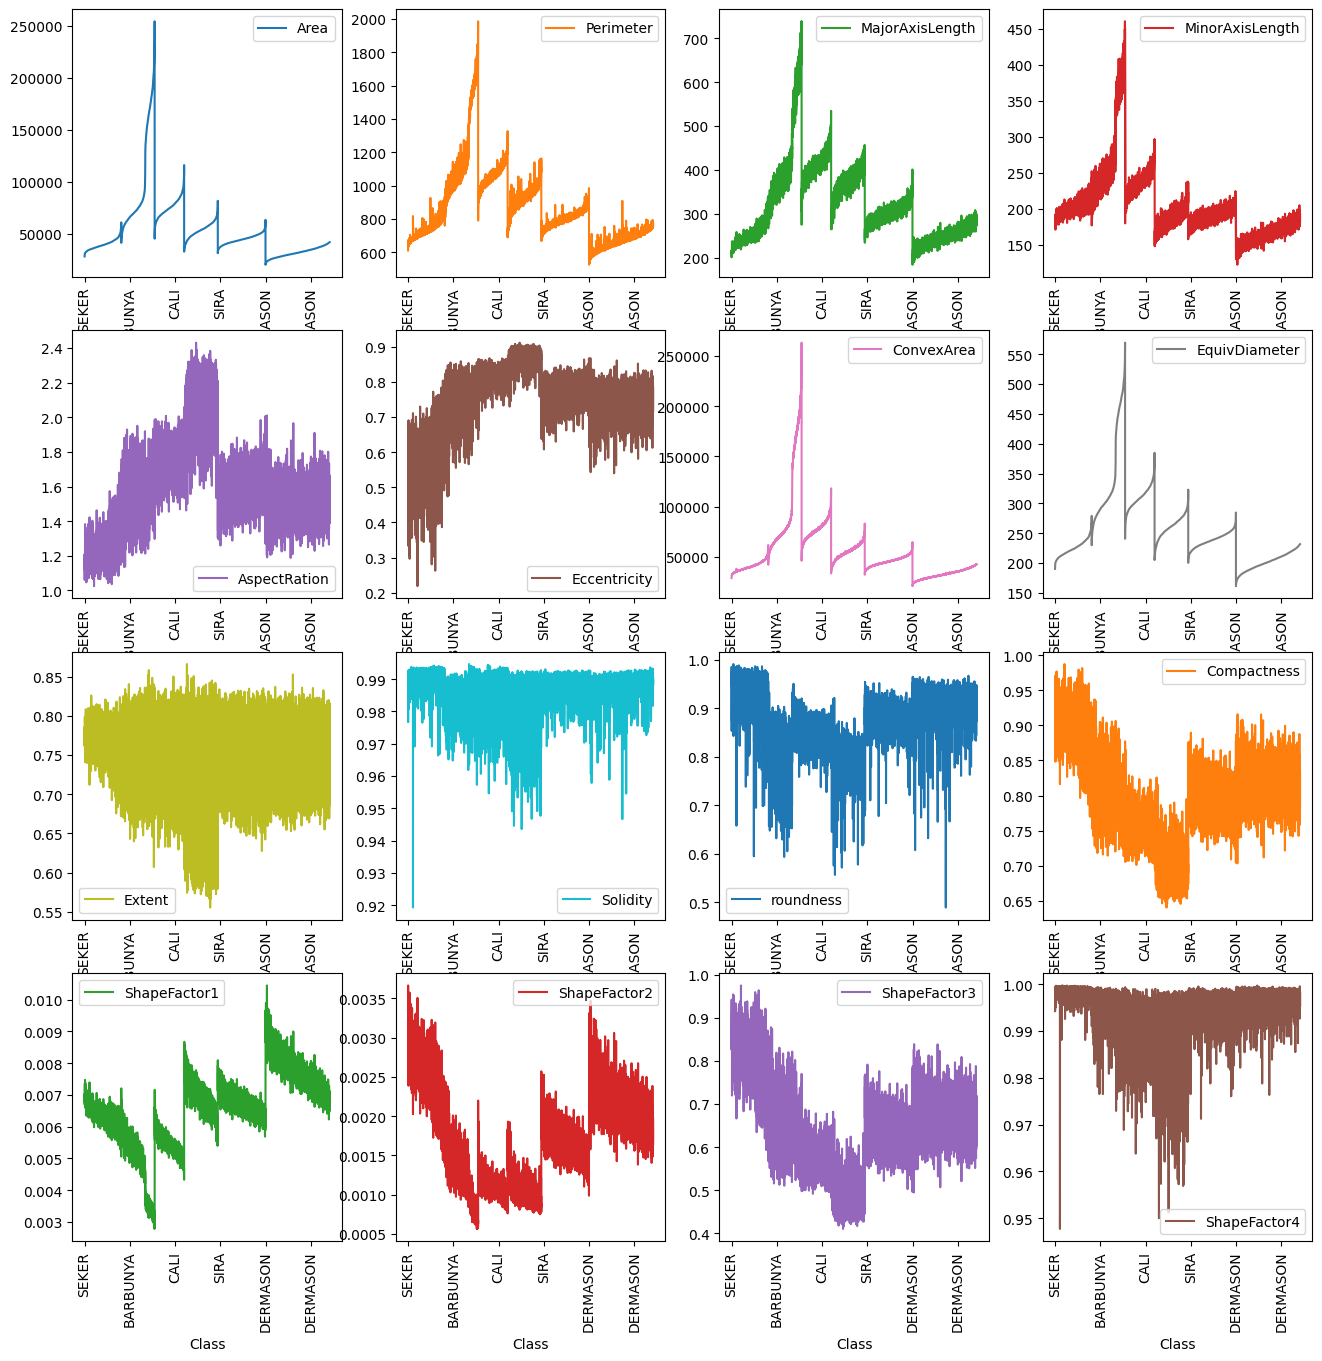

In [ ]:
indicators = df.columns[:-2]
import matplotlib.pyplot as plt
df.plot(x = "Class", y = indicators, subplots = True, layout = (4, 4),
       figsize = (16, 16), sharex = False, rot = 90)
plt.show()

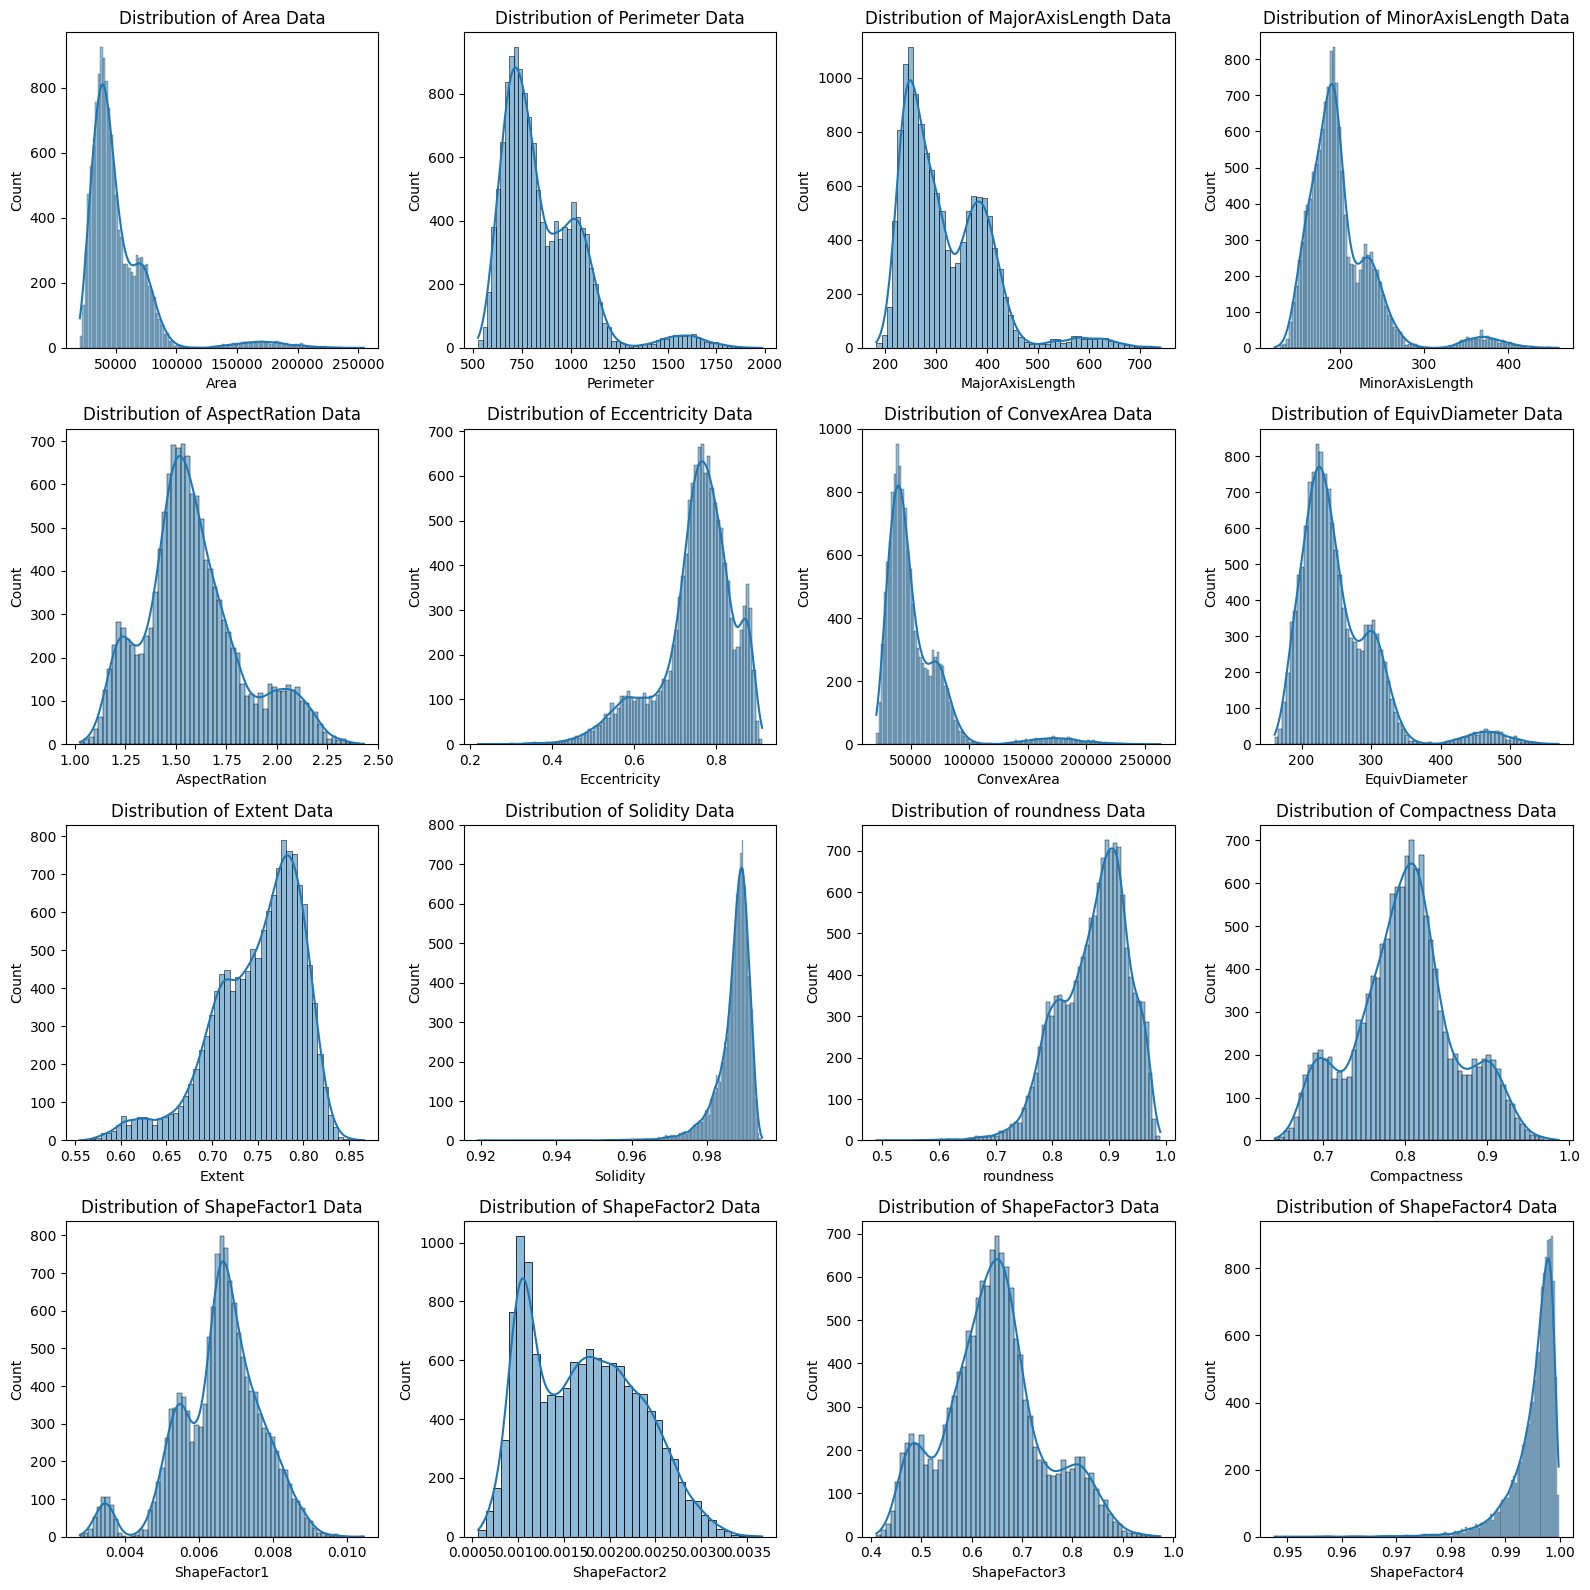

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.figure(figsize = (16, 16))
for i, col in enumerate(indicators, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde= True)
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()

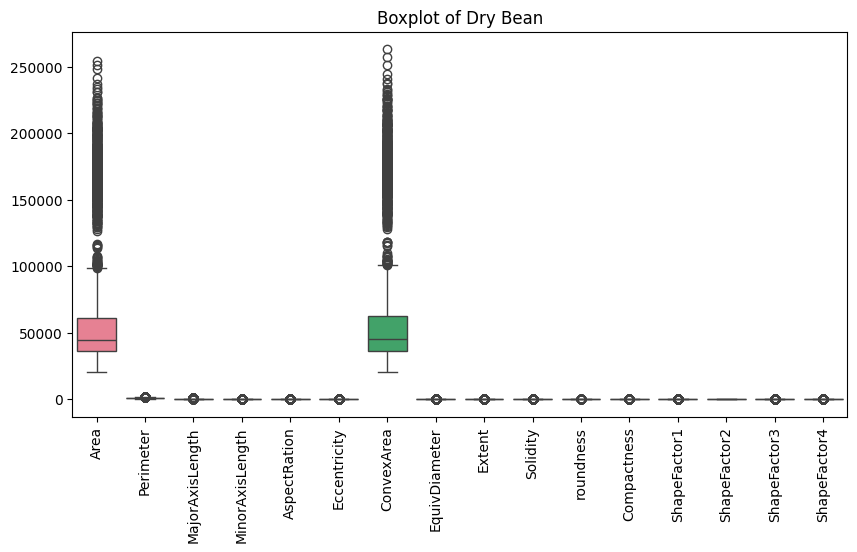

In [ ]:
# Check outlier of Dry Bean features
plt.figure(figsize = (10, 5))
sns.boxplot(df[indicators])
plt.title("Boxplot of Dry Bean")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Delete outlier of "Area" & "ConvexArea"
df = df[(df["Area"] < 100000) | (df["ConvexArea"] < 100000)]

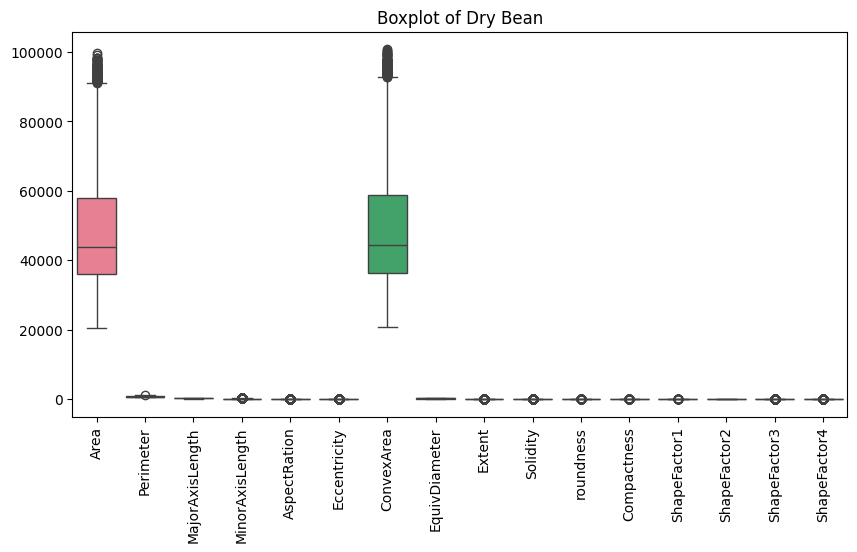

In [ ]:
# Check Dry Bean features which outliers are deleted
plt.figure(figsize = (10, 5))
sns.boxplot(df[indicators])
plt.title("Boxplot of Dry Bean")
plt.xticks(rotation = 90)
plt.show()

In [ ]:

# Correlation of Dry Bran with Class
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Class"] = le.fit_transform(df["Class"])
df_corr = df.corr()
df_corr["Class"].sort_values(ascending = False)

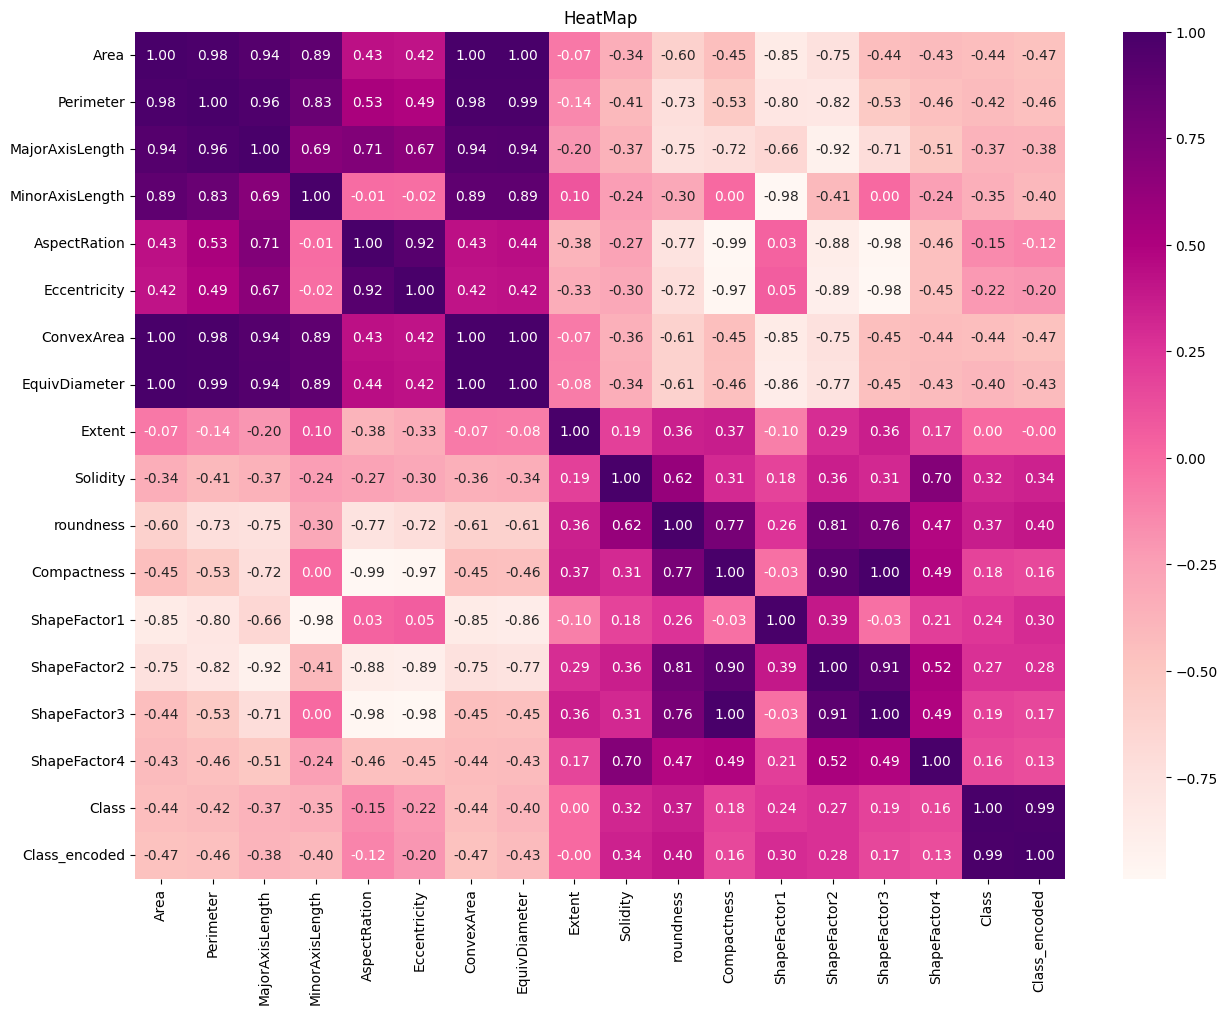

In [ ]:
# Heatmap ->

plt.figure(figsize = (15,11))
sns.heatmap(df_corr,  cmap = 'RdPu',annot = True, fmt = ".2f")
plt.title('HeatMap')
plt.show()

In [ ]:
# Separating the data
X = df.drop("Class", axis = 1)
y = df["Class"]

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [ ]:
# Crteating the Logistic Regression Model
model = LogisticRegression()

# Fitting the data
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Taking predictions from the model
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [ ]:
# Model Evaluation
print('Training Accuracy: ', metrics.accuracy_score(y_train, y_train_pred))
print('Testing Accuracy: ', metrics.accuracy_score(y_test, y_test_pred))

Training Accuracy:  0.6825733800996862
Testing Accuracy:  0.6692506459948321


In [ ]:
# one hot encoding for targrt
classDumpy = pd.get_dummies(df["Class"] )
data =pd.concat([df.drop("Class",axis=1),classDumpy.astype(int)],axis=1)
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor2,ShapeFactor3,ShapeFactor4,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,...,0.003147,0.834222,0.998724,0,0,0,0,0,1,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,...,0.003564,0.909851,0.998430,0,0,0,0,0,1,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,...,0.003048,0.825871,0.999066,0,0,0,0,0,1,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,...,0.003215,0.861794,0.994199,0,0,0,0,0,1,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,...,0.003665,0.941900,0.999166,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,...,0.001749,0.642988,0.998385,0,0,0,1,0,0,0
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,...,0.001886,0.676099,0.998219,0,0,0,1,0,0,0
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,...,0.001888,0.676884,0.996767,0,0,0,1,0,0,0
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,...,0.001852,0.668237,0.995222,0,0,0,1,0,0,0
